# regression for speed
Author: Bujie Xu

speed = Distance/measured time

# regression for power

## Load Data 

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png' 
%matplotlib inline

In [24]:
# load data
train = pd.read_csv(filepath_or_buffer="../data/data_train.csv",sep=";")
test = pd.read_csv(filepath_or_buffer="../data/data_test.csv",sep=";")

In [25]:
train.head()

,RiderID,Index,Date,Time,Average_Gradient,Max_Gradient,Distance,Highest_point,Lowest_point,Measured_time,Moving_time,Average_heart_rate,Max_heart_rate,Speed,Power,Cadence
0,1,78294,2015-02-09,05:50:12,0.0,5.0,9980.400,128.4,124.6,1375,1375,105.8,114,7.258473,92.4,85.3
1,1,62861,2014-08-23,12:52:26,3.3,16.0,1666.010,204.6,147.9,252,252,157.5,170,6.611151,271.9,88.3
2,1,88658,2014-09-30,06:19:38,0.0,0.0,345.600,59.0,59.0,36,36,158.9,160,9.600000,274.4,103.4
3,1,77748,2015-02-21,14:25:18,-8.3,-0.5,1572.900,617.8,487.2,123,123,99.1,104,12.787805,72.8,66.4
4,1,64485,2012-08-24,06:34:28,-7.6,-4.8,435.352,54.4,21.4,59,59,100.3,111,7.378847,4.9,60.3


In [26]:
test.head()

,Id,RiderID,Index,Date,Time,Average_Gradient,Max_Gradient,Distance,Highest_point,Lowest_point,Measured_time,Moving_time,Average_heart_rate,Max_heart_rate,Speed,Power,Cadence
0,1,1,87837,2012-05-20,09:04:45,1.6,2.2,506.70,5.6,-2.4,50,50,173.6,176,NaN,397.2,90.6
1,2,1,13232,2013-08-26,06:43:07,0.0,0.0,351.68,32.0,32.0,58,58,110.8,115,NaN,64.2,89.7
2,3,1,63908,2013-10-26,08:51:52,-4.7,-1.8,650.00,236.4,206.0,54,54,94.8,100,NaN,21.3,75.9
3,4,1,97224,2014-09-08,07:00:46,0.0,0.0,345.60,59.0,59.0,63,63,116.1,121,NaN,85.4,69.0
4,5,1,69163,2015-04-09,05:53:50,0.0,0.0,345.60,59.0,59.0,52,52,112.5,114,NaN,84.8,84.8


# Data Preprocessing

In [190]:
# remove useless columns
data = train.drop(["Index","Date","Time","RiderID"], axis=1)
rider = pd.get_dummies(train['RiderID'].astype('category'))

In [191]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X, y = data.drop(['Power'], axis=1), data['Power']

In [192]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(2)
X = ploy.fit_transform(X)

In [193]:
X = np.hstack((X,rider))

In [194]:
X

array([[  1. ,   0. ,   5. , ...,   0. ,   0. ,   0. ],
       [  1. ,   3.3,  16. , ...,   0. ,   0. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ..., 
       [  1. ,  -0.3,   3.7, ...,   0. ,   0. ,   1. ],
       [  1. ,  -0.2,  11.7, ...,   0. ,   0. ,   1. ],
       [  1. ,   0. ,   0. , ...,   0. ,   0. ,   1. ]])

In [28]:
#def logPlot(col):
#    matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
#    data = pd.DataFrame({col:train[col],"log(distance +1)":np.log1p(train[col])})
#    data.hist()

In [63]:
# log transform skewed numeric features:
#numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index
#print numeric_feats
#skewed_feats = train_data[numeric_feats].apply(lambda x: skew(x.dropna()))
#print skewed_feats
#skewed_feats = skewed_feats[skewed_feats >= ]

## Models
use regularized linear regression models from scikit learn module. try both Lasso and Ridge regularization.

In [195]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [196]:
model_ridge = Ridge()

In [197]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,200]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

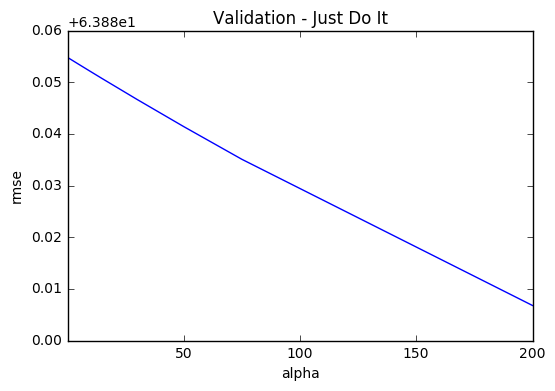

In [198]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [199]:
cv_ridge.min()

63.886775652083053

In [106]:
# neural_newtowrk
from sklearn.neural_network import MLPRegressor
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(MLPRegressor(alpha = alpha)).mean() for alpha in alphas]

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators= 500, n_jobs=1)
cv_ridge = rmse_cv(clf)

In [ ]:
cv_ridge